In [6]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [7]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [8]:
# Display the first few rows of the dataframe
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# Selecting the Annual Income and Spending Score columns for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Finding the optimal number of clusters using the Elbow method
wcss = []
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0, 0.5, 'WCSS')

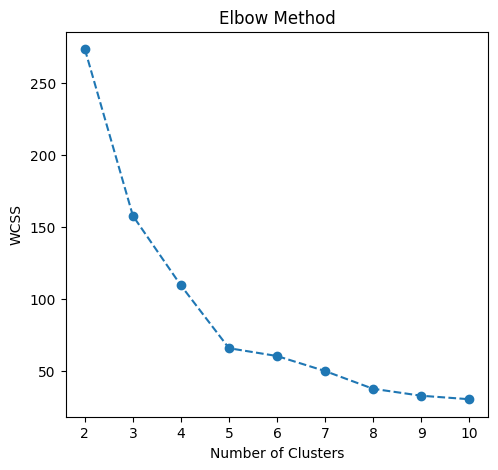

In [12]:
# Plotting the Elbow method results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

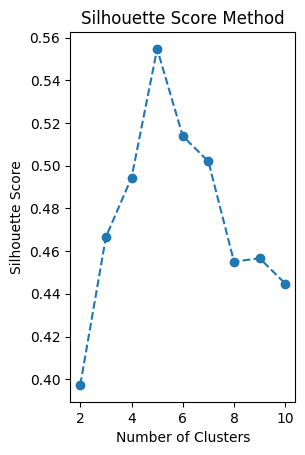

In [13]:
# Plotting the Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [14]:
# Based on the Elbow method and Silhouette scores, we choose the optimal number of clusters as 5
n_clusters = 5

In [15]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [16]:
# Adding the cluster labels to the original dataframe
data['Cluster'] = clusters

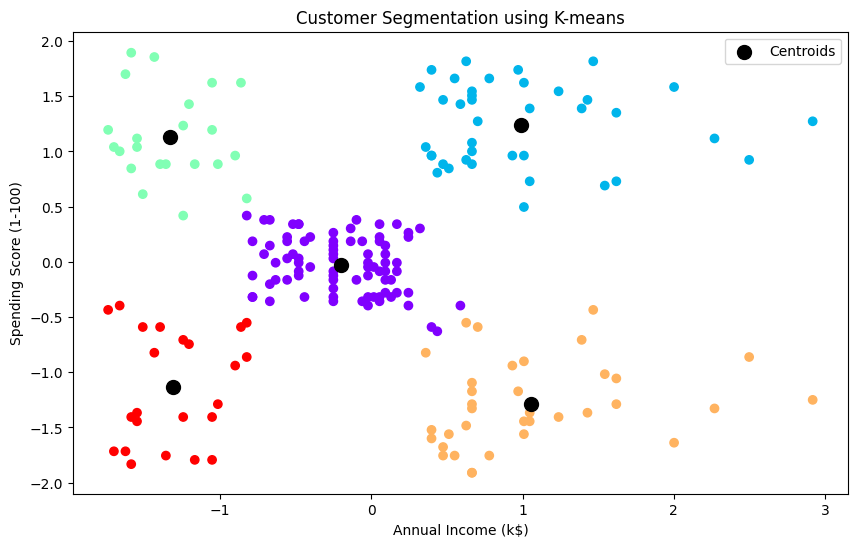

In [17]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Segmentation using K-means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
# Displaying the cluster centers
print('Cluster Centers:')
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
